<img src="../fasp/runner/credits/images/FASPNotebook02.jpg" style="float: right;">

### BioDataCatalyst and CRDC Search-Locate-Compute
This script runs the same work as FASPScript2, adapted to use FASPRunner and a WES Client.

In [1]:
from fasp.runner import FASPRunner

# The implementations we're using
from fasp.loc import DRSMetaResolver
from fasp.workflow import sbcgcWESClient
from fasp.search import DiscoverySearchClient, BigQuerySearchClient

faspRunner = FASPRunner(program='FASPNotebook02')
runNote = 'CRDC and BioDataCatalyst via FASPRunner, GA4GH++'

### Step 1 - Discovery
Query for relevant sequence files and get theit DRD ids.

This example simply explores that we can query from different sources of subject/sample data and get files from two different cloud platforms.

In [2]:
# TCGA Query - CRDC
crdcquery = """
    SELECT 'case_'||associated_entities__case_gdc_id , 'crdc:'||file_id
    FROM search_cloud.cshcodeathon.gdc_rel24_filedata_active 
    where data_format = 'BAM' 
    and project_disease_type = 'Breast Invasive Carcinoma'
    limit 3"""

#COPD query - BioDataCatalyst
bdcquery = """
    SELECT SUBJECT_ID, 'bdc:'||read_drs_id
    FROM `isbcgc-216220.COPDGene.phenotype_drs`
    where Weight_KG between 92.5 and 93.0
    LIMIT 3"""

### Run FASPRunner against NCI Cancer Research Data Commons	
Configure FASPRunner with the three clients needed

In [3]:
searchClient = DiscoverySearchClient('https://ga4gh-search-adapter-presto-public.prod.dnastack.com/')

drsClient = DRSMetaResolver()

# Step 3 - set up a class that runs samtools for us
# providing the location for the results
settings = faspRunner.settings
wesClient = sbcgcWESClient(settings['SevenBridgesProject'])
faspRunner.configure(searchClient, drsClient, wesClient)
runList = faspRunner.runQuery(crdcquery, runNote)

Searching the GA4GH registry for org.ga4gh:drs services
Running query

    SELECT 'case_'||associated_entities__case_gdc_id , 'crdc:'||file_id
    FROM search_cloud.cshcodeathon.gdc_rel24_filedata_active 
    where data_format = 'BAM' 
    and project_disease_type = 'Breast Invasive Carcinoma'
    limit 3
_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
subject=case_1b703058-e596-45bc-80fe-8b98d545c2e2, drsID=crdc:030e5e74-6461-4f05-a399-de8e470bc056
workflow submitted, run:fba58c7d-eb69-458d-a5fd-57f383d24bf4
____________________________________________________________
subject=case_a947a945-4721-45cc-bc45-13b8ea41c10e, drsID=crdc:04c68898-ddac-4e15-9f9a-5bf278d55e4a
workflow submitted, run:8a935f7c-c245-4207-a557-f2f38434af51
____________________________________________________________
subject=case_c462e422-eb8d-4daf-9897-2a9c6cbd783a, drsID=crdc:00589653-5840-4c11-8572-5aa7d00a73f8
work

### Run FASPRunner against BioDataCatalyst	
Reconfigure and run the FASPClient for the BioDataCatalyst data

In [4]:
searchClient = BigQuerySearchClient()
faspRunner.configure(searchClient, drsClient, wesClient)
runList = faspRunner.runQuery(bdcquery, runNote)

Running query

    SELECT SUBJECT_ID, 'bdc:'||read_drs_id
    FROM `isbcgc-216220.COPDGene.phenotype_drs`
    where Weight_KG between 92.5 and 93.0
    LIMIT 3
subject=COPDGene_C71930, drsID=bdc:dg.4503/13e60549-3e96-41de-8a16-6791f9e57b22
workflow submitted, run:0e4eb689-2a2a-4dab-a6a5-fef457254a14
____________________________________________________________
subject=COPDGene_T80566, drsID=bdc:dg.4503/a3730574-4252-49e1-abe0-1827a605d11e
workflow submitted, run:18297549-4067-4b97-b753-a1fa726c1889
____________________________________________________________
subject=COPDGene_W77942, drsID=bdc:dg.4503/5414f5f4-e743-4d68-90c1-0a9f30e2eaec
workflow submitted, run:53d055ff-9b15-4585-8a23-9cc7cb36967e
____________________________________________________________


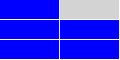

In [5]:
faspRunner.getFASPicon()